In [57]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [58]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [59]:
train_images.shape

(60000, 28, 28)

In [60]:
train_labels.shape

(60000,)

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28, )),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [63]:
X_train = train_images[:50000]
X_valid = train_images[50000:]

In [64]:
X_train = X_train.reshape((50000, 28 * 28))
X_train= X_train.astype('float32') / 255

In [65]:
X_valid = X_valid.reshape((10000, 28 * 28))
X_valid = X_valid.astype('float32') / 255

In [66]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [67]:
y_train = train_labels[:50000]
y_valid = train_labels[50000:]

In [68]:
from tensorflow.keras.utils import to_categorical

In [69]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [70]:
test_labels = to_categorical(test_labels)

In [71]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/5
391/391 [==============================] - 5s 11ms/step - loss: 0.2414 - accuracy: 0.9290 - val_loss: 0.1136 - val_accuracy: 0.9665
Epoch 2/5
391/391 [==============================] - 4s 11ms/step - loss: 0.0876 - accuracy: 0.9735 - val_loss: 0.0966 - val_accuracy: 0.9710
Epoch 3/5
391/391 [==============================] - 4s 10ms/step - loss: 0.0550 - accuracy: 0.9825 - val_loss: 0.0832 - val_accuracy: 0.9752
Epoch 4/5
391/391 [==============================] - 4s 11ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0779 - val_accuracy: 0.9764
Epoch 5/5
391/391 [==============================] - 4s 10ms/step - loss: 0.0270 - accuracy: 0.9910 - val_loss: 0.0784 - val_accuracy: 0.9790


In [73]:
history_df = history.history

In [74]:
history_df.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [76]:
loss_values = history_df['loss']
val_loss_values = history_df['val_loss']
epochs= range(1, len(history_df['accuracy']) + 1)

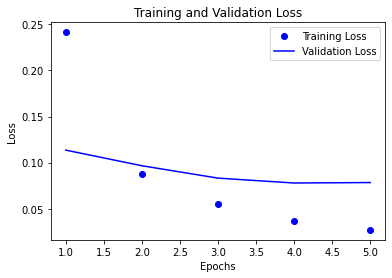

In [78]:
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

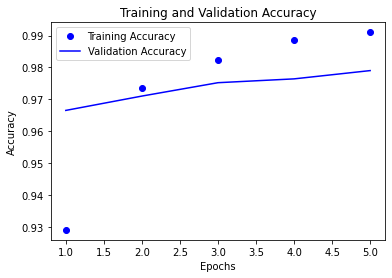

In [81]:
accuracy_values = history_df['accuracy']
val_accuracy_values = history_df['val_accuracy']
plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [82]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0775 - accuracy: 0.9778
